**Chargement du csv**

In [1]:
import numpy as np
import pandas as pd

In [2]:
geo=pd.read_csv("correspondance-code-insee-code-postal.csv",sep=';',usecols=range(11))
geo=geo.set_index('Code INSEE')

In [3]:
geo['latitude']=geo['geo_point_2d'].apply(lambda x : x.split(',')[0]).astype(float)
geo['longitude']=geo['geo_point_2d'].apply(lambda x : x.split(',')[1]).astype(float)
geo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36742 entries, 31080 to 50224
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Code Postal       36742 non-null  object 
 1   Commune           36742 non-null  object 
 2   Département       36742 non-null  object 
 3   Région            36742 non-null  object 
 4   Statut            36742 non-null  object 
 5   Altitude Moyenne  36742 non-null  float64
 6   Superficie        36742 non-null  float64
 7   Population        36742 non-null  float64
 8   geo_point_2d      36742 non-null  object 
 9   geo_shape         36742 non-null  object 
 10  latitude          36742 non-null  float64
 11  longitude         36742 non-null  float64
dtypes: float64(5), object(7)
memory usage: 3.6+ MB


## Projet maison n° 1

- Ajoutez une colonne 'CP Ville' avec le Code postal + un espace + et le nom de la Ville.
- Ecrivez une fonction qui détermine la commune la plus proche d'un point à partir de sa latitude et sa longitude.
- Ajoutez une fonction de conversion pour pouvoir utiliser la première fonction avec un GPS (degrés, minutes, secondes).

In [4]:
geo['CP Ville']=geo['Code Postal']+' '+geo['Commune']
geo

,Code Postal,Commune,Département,Région,Statut,Altitude Moyenne,Superficie,Population,geo_point_2d,geo_shape,latitude,longitude,CP Ville
Code INSEE,,,,,,,,,,,,,
31080,31350,BOULOGNE-SUR-GESSE,HAUTE-GARONNE,MIDI-PYRENEES,Chef-lieu canton,301.0,2470.0,1.6,"43.2904403081, 0.650641474176","{""type"": ""Polygon"", ""coordinates"": [[[0.671852...",43.290440,0.650641,31350 BOULOGNE-SUR-GESSE
11143,11510,FEUILLA,AUDE,LANGUEDOC-ROUSSILLON,Commune simple,314.0,2426.0,0.1,"42.9291375888, 2.90138923544","{""type"": ""Polygon"", ""coordinates"": [[[2.906996...",42.929138,2.901389,11510 FEUILLA
43028,43200,BESSAMOREL,HAUTE-LOIRE,AUVERGNE,Commune simple,888.0,743.0,0.4,"45.1306448726, 4.07952494849","{""type"": ""Polygon"", ""coordinates"": [[[4.091674...",45.130645,4.079525,43200 BESSAMOREL
78506,78660,PRUNAY-EN-YVELINES,YVELINES,ILE-DE-FRANCE,Commune simple,155.0,2717.0,0.8,"48.5267627187, 1.80513972814","{""type"": ""Polygon"", ""coordinates"": [[[1.829610...",48.526763,1.805140,78660 PRUNAY-EN-YVELINES
84081,84310,MORIERES-LES-AVIGNON,VAUCLUSE,PROVENCE-ALPES-COTE D'AZUR,Commune simple,49.0,1042.0,7.6,"43.9337788848, 4.90875878315","{""type"": ""Polygon"", ""coordinates"": [[[4.927176...",43.933779,4.908759,84310 MORIERES-LES-AVIGNON
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74066,74270,CHAVANNAZ,HAUTE-SAVOIE,RHONE-ALPES,Commune simple,564.0,321.0,0.2,"46.0500384099, 6.01652644319","{""type"": ""Polygon"", ""coordinates"": [[[6.026228...",46.050038,6.016526,74270 CHAVANNAZ
67315,67630,NEEWILLER-PRES-LAUTERBOURG,BAS-RHIN,ALSACE,Commune simple,157.0,725.0,0.7,"48.9516989257, 8.11931601006","{""type"": ""Polygon"", ""coordinates"": [[[8.106826...",48.951699,8.119316,67630 NEEWILLER-PRES-LAUTERBOURG
07122,07200,LACHAPELLE-SOUS-AUBENAS,ARDECHE,RHONE-ALPES,Commune simple,257.0,1018.0,1.5,"44.5622616562, 4.35906947518","{""type"": ""Polygon"", ""coordinates"": [[[4.356584...",44.562262,4.359069,07200 LACHAPELLE-SOUS-AUBENAS


Formule de la distance entre deux points, ϕ étant les valeurs de latitude et λ les valeurs de longitude :   
Angle en radians : A = arccos (sin ϕA sin ϕB + cos ϕA cos ϕB cos dλ) avec dλ = λB – λA  
Distance en m : D = A * Rterre = A * 6 378 137

In [5]:
# fonction recherche de ville
def ville(lat, long):
    
    lat_rad=np.radians(lat)
    long_rad=np.radians(long)
    
    s_lat_rad=geo['latitude'].apply(np.radians)
    s_long_rad=geo['longitude'].apply(np.radians)
    
    distances_angulaires = (s_lat_rad.apply(np.sin)*np.sin(lat_rad)+s_lat_rad.apply(np.cos)*np.cos(lat_rad)*(-(s_long_rad-long_rad)).apply(np.cos)).apply(np.arccos)
    distances_km =distances_angulaires*6378.137
    
    return geo.loc[distances_km.idxmin(),'CP Ville']


ville(46.3,4.93)

'01380 BAGE-LE-CHATEL'

In [6]:
# on applique la fonction à une coordonnée tirée au hasard
# init du random
np.random.seed()

a, b = 41.5, 51.1  # latitude min et max de la France métropolitaine
lat = (b - a) * np.random.random() + a
a, b = -5.1, 9.5  # longitude min et max de la France métropolitaine
long = (b - a) * np.random.random() + a

ville(lat, long)

'68480 KIFFIS'

In [7]:
# conversion degrés, minutes, secondes => décimal
def dms2dec(deg, mn, sec):
    val_dd=deg+mn/60+sec/3600
    return val_dd

dms2dec(10,15,22)

10.25611111111111

In [8]:
# à partir de coordonnées GPS précises
ville(dms2dec(48, 42, 52), dms2dec(2, 14, 45))

'91120 PALAISEAU'

## Projet maison n° 2

La colonne "geo_shape" comporte des chaines de catactères au format JSON. Elles représentent les formes géométriques des communes qui sont soit des polygones soit composées de plusieurs polygones.

- Utiliser la librairie Python json pour parser la colonne "geo_shape".
- Donner le décompte des valeurs accédées avec la clé "type".
- Donner le décompte des longueurs des listes accédées avec la clé "coordinates".
- Quelle commune est la plus complexe géométriquement ?
- Quelle commune est la seconde la plus complexe géométriquement ?
- Quelles sont les villes qui sont de type "Polygon" mais dont la longueur des listes accédées avec la clé "coordinates" vaut 2 ?
- Pour ces villes vérifier que le premier polygone contient bien le second (enclave). *Nota bene* : installer la librairie shapely, utiliser la classe Polygon de shapely.geometry. Sur Windows shapely peut nécessiter d'installer la dll "geos_c.dll" dans le répertoire "Library/bin" de votre environnement Python.

In [9]:
import json
y = geo.loc["01001", "geo_shape"]
print(y)
print(type(y))
d = json.loads(y)
print(d)
print(type(d))

{"type": "Polygon", "coordinates": [[[4.92627342692396, 46.1200517234555], [4.92199538031264, 46.12069170563269], [4.921996260482057, 46.12663667307488], [4.90936269187648, 46.129164756530656], [4.916016986429157, 46.14461766984426], [4.903080786126749, 46.157977074275074], [4.904571300671208, 46.16096059498421], [4.910603091203733, 46.180432597608316], [4.914119126867876, 46.18271538441311], [4.932895432675545, 46.18304616431434], [4.938729478686701, 46.17383114520867], [4.933038591703602, 46.16429901579509], [4.958286230120842, 46.153246666893935], [4.943330383388636, 46.145964148557894], [4.939154593056283, 46.12938048470421], [4.931056072485923, 46.12087123131487], [4.92627342692396, 46.1200517234555]]]}
<class 'str'>
{'type': 'Polygon', 'coordinates': [[[4.92627342692396, 46.1200517234555], [4.92199538031264, 46.12069170563269], [4.921996260482057, 46.12663667307488], [4.90936269187648, 46.129164756530656], [4.916016986429157, 46.14461766984426], [4.903080786126749, 46.15797707427

In [10]:
d['type']

'Polygon'

In [11]:
d['coordinates'][0][0]

[4.92627342692396, 46.1200517234555]

In [12]:
print(d['coordinates'])
print(type(d['coordinates']))

[[[4.92627342692396, 46.1200517234555], [4.92199538031264, 46.12069170563269], [4.921996260482057, 46.12663667307488], [4.90936269187648, 46.129164756530656], [4.916016986429157, 46.14461766984426], [4.903080786126749, 46.157977074275074], [4.904571300671208, 46.16096059498421], [4.910603091203733, 46.180432597608316], [4.914119126867876, 46.18271538441311], [4.932895432675545, 46.18304616431434], [4.938729478686701, 46.17383114520867], [4.933038591703602, 46.16429901579509], [4.958286230120842, 46.153246666893935], [4.943330383388636, 46.145964148557894], [4.939154593056283, 46.12938048470421], [4.931056072485923, 46.12087123131487], [4.92627342692396, 46.1200517234555]]]
<class 'list'>


**Décompte par type de shape**

In [13]:
geo['geo_shape']=geo['geo_shape'].apply(lambda x : json.loads(x))

In [14]:
geo['geo_shape'].apply(lambda x: x["type"]).value_counts()

Polygon         36670
MultiPolygon       72
Name: geo_shape, dtype: int64

**Décompte par taille de la liste de coordonnées**

In [15]:
serie_triee_nb_polyg_par_ville=geo['geo_shape'].apply(lambda x: len(x["coordinates"])).sort_values(ascending=False)

In [16]:
max_nb_polyg=serie_triee_nb_polyg_par_ville.iloc[0]
max2_nb_polyg=serie_triee_nb_polyg_par_ville.iloc[1]

In [17]:
geo['geo_shape'].apply(lambda x: len(x["coordinates"])).value_counts()

1    36660
2       80
3        1
4        1
Name: geo_shape, dtype: int64

**Ville la plus complexe géométriquement : critère sur le nombre de polygones**  

In [18]:
geo.loc[geo['geo_shape'].apply(lambda x: len(x["coordinates"]))==max_nb_polyg]

,Code Postal,Commune,Département,Région,Statut,Altitude Moyenne,Superficie,Population,geo_point_2d,geo_shape,latitude,longitude,CP Ville
Code INSEE,,,,,,,,,,,,,
83069,83400,HYERES,VAR,PROVENCE-ALPES-COTE D'AZUR,Chef-lieu canton,60.0,13356.0,54.7,"43.1018713534, 6.18898508469","{'type': 'MultiPolygon', 'coordinates': [[[[6....",43.101871,6.188985,83400 HYERES


In [19]:
geo.loc[geo['geo_shape'].apply(lambda x: len(x["coordinates"]))==max2_nb_polyg]

,Code Postal,Commune,Département,Région,Statut,Altitude Moyenne,Superficie,Population,geo_point_2d,geo_shape,latitude,longitude,CP Ville
Code INSEE,,,,,,,,,,,,,
27701,27100,VAL-DE-REUIL,EURE,HAUTE-NORMANDIE,Chef-lieu canton,23.0,2593.0,13.5,"49.261335704, 1.21147195365","{'type': 'MultiPolygon', 'coordinates': [[[[1....",49.261336,1.211472,27100 VAL-DE-REUIL


**Ville la plus complexe géométriquement : critère sur le nombre de sommets des polygones**  
Les coordonnées sont contenues dans le ddictionnaire en tant que "liste de liste de listes".  
On ne peut pas systématiser de calcul de len(coordinates) sur le deuxième polygone car toutes les entrées n'ont pas forcément de deuxième polygone et quand ce n'est pas le cas, la fonction len retourne une erreur.  
Ainsi, si l'on veut calculer la liste de liste de listes contenant le plus d'éléments, on est obligés de faire des boucles car len() d'une liste de listes de listes ne renvoie que la taille de la liste la plus extérieure (coir ci-dessous). Or, faire des boucles avec des Séries semble complexe.  
Du fait de ces difficultés, je me contente de ne regarder ici que le nombre de sommets du premier polygone

In [20]:
a=[[1,2,3],[1,2,3]]
print(len(a))
print(len(a[0]))

2
3


Décompte du nombre de ville en fonction du nombre de coordonnées du 1er polygone :

In [25]:
geo['geo_shape'].apply(lambda x: len(x["coordinates"][0])).value_counts().sort_values(ascending=False).head(15)

11    3396
12    3336
10    3186
13    3023
9     2822
14    2679
15    2424
8     2174
16    2056
17    1747
18    1503
7     1326
19    1216
20     971
21     793
Name: geo_shape, dtype: int64

Ville ayant le plus de sommets sur son premier polygone

In [26]:
id_ville_max__nb_coord_P1=geo['geo_shape'].apply(lambda x: len(x["coordinates"][0])).idxmax()
max_nb_coord_P1=geo['geo_shape'].apply(lambda x: len(x["coordinates"][0])).max()
print(f"{geo.loc[id_ville_max__nb_coord_P1,'CP Ville']}, Nb de sommets du polygone 1 : {max_nb_coord_P1}")

97370 MARIPASOULA, Nb de sommets du polygone 1 : 486


2ème ville ayant le plus de sommets sur son second polygone (on doit calculer la liste triée car on ne peut plus utiliser la fonction max directement)

In [27]:
serie_triee_nb_coord_P1=geo['geo_shape'].apply(lambda x: len(x["coordinates"][0])).sort_values(ascending=False)
serie_triee_nb_coord_P1

Code INSEE
97353    486
97301    392
97306    334
97356    325
97311    273
        ... 
68315      1
06162      1
57672      1
67043      1
50353      1
Name: geo_shape, Length: 36742, dtype: int64

In [29]:
id_ville_2eme_nb_coord_P1=serie_triee_nb_coord_P1.index[1]
print(f"{geo.loc[id_ville_2eme_nb_coord_P1,'CP Ville']}, Nb de sommets du polygone 1 : {serie_triee_nb_coord_P1.iloc[1]}")

97390 REGINA, Nb de sommets du polygone 1 : 392


**Villes de type "Polygon" mais dont la longueur des listes accédées avec la clé "coordinates" vaut 2**

In [38]:
mask_polyg_simple=(geo['geo_shape'].apply(lambda x: x["type"])=="Polygon")
mask_coord_2_polyg=(geo['geo_shape'].apply(lambda x: len(x["coordinates"]))==2)
villes_polyg_2_set_coord=geo.loc[mask_polyg_simple & mask_coord_2_polyg]
villes_polyg_2_set_coord

,Code Postal,Commune,Département,Région,Statut,Altitude Moyenne,Superficie,Population,geo_point_2d,geo_shape,latitude,longitude,CP Ville
Code INSEE,,,,,,,,,,,,,
2A272,20100,SARTENE,CORSE-DU-SUD,CORSE,Sous-préfecture,190.0,20182.0,3.1,"41.5718443328, 8.93538107497","{'type': 'Polygon', 'coordinates': [[[8.940487...",41.571844,8.935381,20100 SARTENE
48080,48300,LANGOGNE,LOZERE,LANGUEDOC-ROUSSILLON,Chef-lieu canton,973.0,3124.0,3.1,"44.7237405653, 3.83363110341","{'type': 'Polygon', 'coordinates': [[[3.850531...",44.723741,3.833631,48300 LANGOGNE
09042,09240,LA BASTIDE-DE-SEROU,ARIEGE,MIDI-PYRENEES,Chef-lieu canton,479.0,4138.0,1.0,"43.0242795037, 1.42677885373","{'type': 'Polygon', 'coordinates': [[[1.423960...",43.024280,1.426779,09240 LA BASTIDE-DE-SEROU
71028,71270,BEAUVERNOIS,SAONE-ET-LOIRE,BOURGOGNE,Commune simple,204.0,882.0,0.1,"46.8413806403, 5.4403170068","{'type': 'Polygon', 'coordinates': [[[5.416652...",46.841381,5.440317,71270 BEAUVERNOIS
22209,22650,PLOUBALAY,COTES-D'ARMOR,BRETAGNE,Chef-lieu canton,36.0,3600.0,2.7,"48.5596688192, -2.12838362694","{'type': 'Polygon', 'coordinates': [[[-2.11237...",48.559669,-2.128384,22650 PLOUBALAY
02232,02600,COYOLLES,AISNE,PICARDIE,Commune simple,126.0,2489.0,0.4,"49.2133089693, 3.01306173751","{'type': 'Polygon', 'coordinates': [[[3.037897...",49.213309,3.013062,02600 COYOLLES
2B049,20214,CALENZANA,HAUTE-CORSE,CORSE,Chef-lieu canton,596.0,18465.0,2.1,"42.4784267166, 8.80369225001","{'type': 'Polygon', 'coordinates': [[[8.911220...",42.478427,8.803692,20214 CALENZANA
05052,05600,EYGLIERS,HAUTES-ALPES,PROVENCE-ALPES-COTE D'AZUR,Commune simple,1615.0,2987.0,0.7,"44.6925244966, 6.66688741371","{'type': 'Polygon', 'coordinates': [[[6.719912...",44.692524,6.666887,05600 EYGLIERS
67486,67920,SUNDHOUSE,BAS-RHIN,ALSACE,Commune simple,166.0,1590.0,1.5,"48.2550723499, 7.63031906582","{'type': 'Polygon', 'coordinates': [[[7.594939...",48.255072,7.630319,67920 SUNDHOUSE


**Vérification si les polygones N°2 sont bien contenus dans les polygones N°1 pour les 10 villes ci-dessus**

Avec shapely

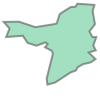

In [79]:
import shapely
from shapely.geometry import Polygon

#Listes contenant pour chaque ville une liste contenant elle même une liste [x,y] pour chaque sommet du polygone
coord_P1 = villes_polyg_2_set_coord['geo_shape'].apply(lambda x: x['coordinates'][0])
coord_P2=villes_polyg_2_set_coord['geo_shape'].apply(lambda x: x['coordinates'][1])

In [87]:
res=dict()
for i in range(coord_P1.size):
    P1 = Polygon(coord_P1[i])
    P2 = Polygon(coord_P2[i])
    res[villes_polyg_2_set_coord.index[i]]=P1.contains(P2)

print("P2 est une enclave de P1 :")
res

P2 est une enclave de P1 :


{'2A272': True,
 '48080': True,
 '09042': True,
 '71028': True,
 '22209': True,
 '02232': True,
 '2B049': True,
 '05052': True,
 '67486': True,
 '68078': True}

En dessinant avec Matplotlib

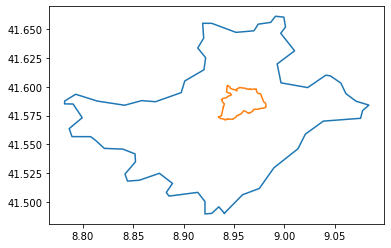

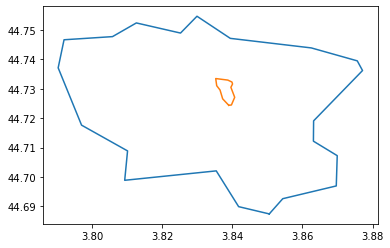

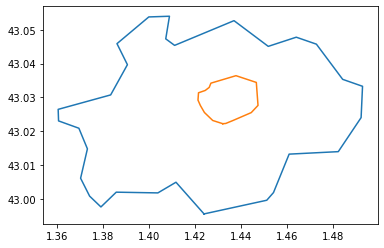

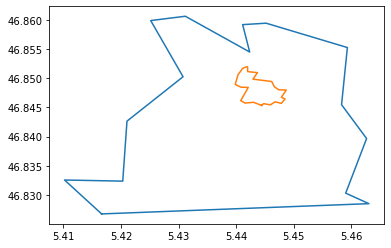

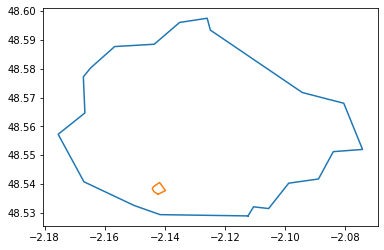

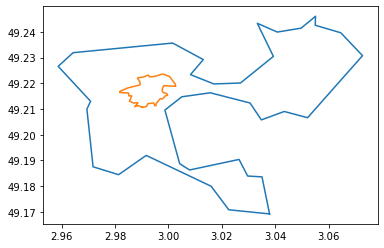

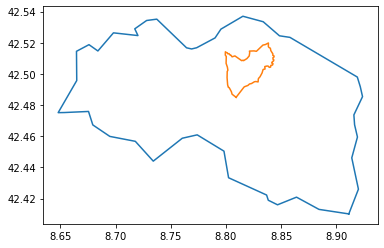

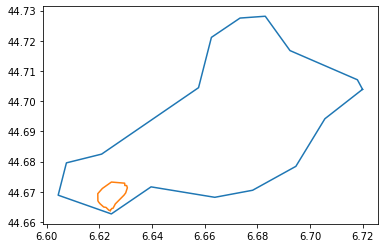

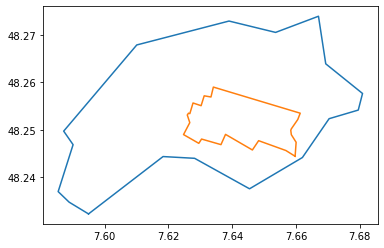

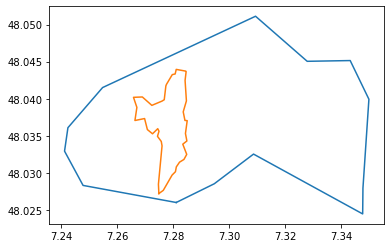

In [64]:
import matplotlib.pyplot as plt

# liste contenant pour chaque ville une liste contenant l'ensemble des coordonnées x ou y des sommets du polygone
# pour la fonction plot, il est nécessaire de séparer les absices dans une liste et les ordonnées dans une autre
coord_P1_x=[[x[0] for x in y] for y in coord_P1]
coord_P1_y=[[x[1] for x in y] for y in coord_P1]

coord_P2_x=[[x[0] for x in y] for y in coord_P2]
coord_P2_y=[[x[1] for x in y] for y in coord_P2]

for i in range(len(coord_P1_x)):
    plt.figure()
    plt.plot(coord_P1_x[i],coord_P1_y[i])
    plt.plot(coord_P2_x[i],coord_P2_y[i])